## Decision making with ML in accounting

Machine learning models excel at making predictions. However, when we use machine learning in decision making, very often interpretability is as important as good predictions. Therefore, research on interpretable machine learning has increased substantially in the last few years, and new methods for the interpretation is introduced almost weekly. To introduce everything would be impossible and therefore, I try to focus on the following to most popular methods that have established their place in the decision making process. Hopefully, this gives a reader knowledge in fundamentals of interpretable machine learning,

Why we need interpretations? If our model is state-of-the-art in prediction, why not just trust the model and forget what is the reason for such a prediction? First of all, even prediction performance can not be measured with a single metric. In the previous chapters we saw that even for binary classifiers, there numerous different metrics to evaluate the prediction performance.

But even if we could measure prediction performance reliably, the interpretation of a model is essential in many applications. Even if we could predict customer churn in our company accurately, we would probably like to know **why** they will churn. Or, if we are using an ML model in our bank to decide who gets a loan an who doesn't, we are probably obliged to **explain** why our model rejected a loan application. Furthermore, in some applications understanding the behaviour of a machine learning model can help us learn more about the problem, the data and the reason why a model might fail. Of course, this is not the case always. For example, it is not vital for a company to understand how its' product recommendation system works. It is enough that it works well and gives the customers recommendations that boosts sales. Furthermore, some methods are extensively studied and evaluated, and therefore, do not need interpretation.

However, interpretation of machine learning models is vital in many applications and the subject of increasing research interest in the ML research community. The more ML is affecting our lives, the more important it is for us to understand its' behaviour. As an example of good progress in the field, internet companies nowadays add an explanation to their product recommendations in the form of products often bought together -list.

In the following, I will go through the most common ML explanation methods. I will explain only the basic idea behind the method and avoid any math. In section 3.2, we will analyse some of these methods in more detail.

### Plots

#### Partial dependence plot
The partial dependence plot (PDP) is a  tool to analyse the marginal effect of one (or few) variables on the prediction. It is calculated by averaging out the effect of other variables. It shows us the functional form of the relationship between the target and a variable. So, initially, the PDP appears to be an excellent tool to analyse the effect of variables to the prediction. However, the assumption of independence is the main issue with PDP plots. The method assumes that the features of a model are not correlated. Because of this, the method also ignores interactions (between analysed and non-analysed variables).

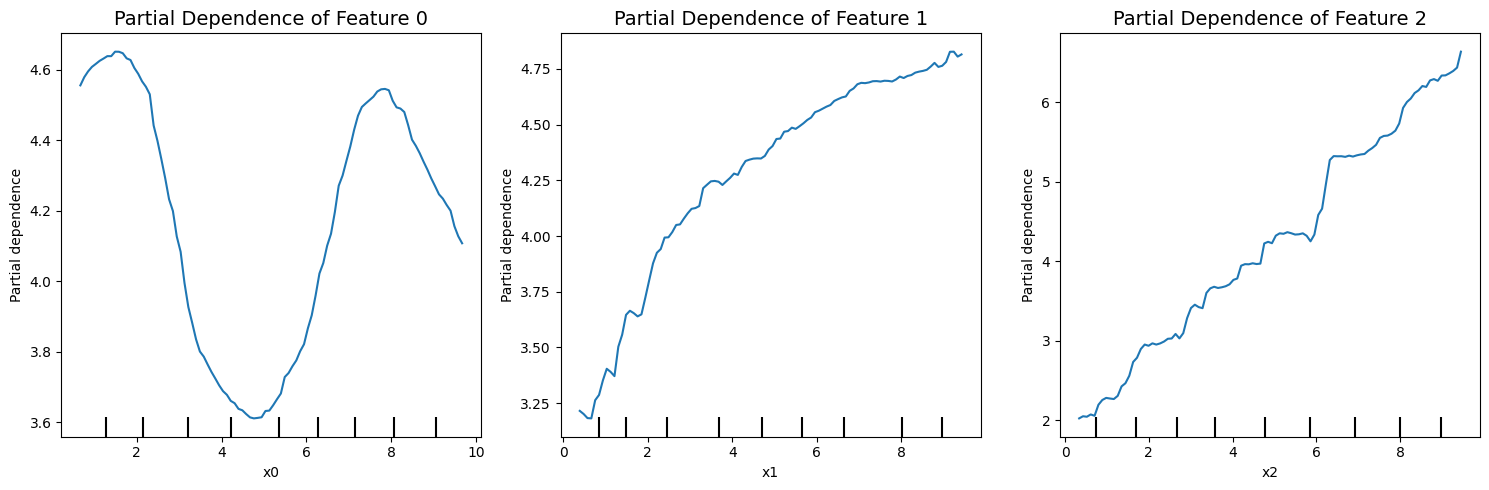

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Generate synthetic data with three features
np.random.seed(42)  
X = np.random.rand(500, 3) * 10  # Three features
y = (np.sin(X[:, 0]) + np.log(X[:, 1] + 1) + 0.5 * X[:, 2] + 
     np.random.normal(scale=0.3, size=500))  # Nonlinear target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Define features for PDP
features = [0, 1, 2]  # Indexes of features

# Create subplots for Partial Dependence Plots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))  # One row, three columns

# Generate PDPs for each feature
for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(model, X_train, features=[feature], ax=axes[i])
    axes[i].set_title(f"Partial Dependence of Feature {feature}", fontsize=14)
    axes[i].set_xlabel(f"Feature {feature} Value", fontsize=12)
    axes[i].set_ylabel("Predicted Response", fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Individual conditional expectations
Individual Conditional Expectation (ICE) plots basically display a PDP line for every instance. Thus, ICE plots show how a variable affects the prediction for every instance separately. A PDP is the average of the lines of an ICE plot. This solves the problem of interaction that PDP plots have. However, the independence assumption still holds and is also on an issue with ICE plots.

![ice_plot](./images/ICE.png)


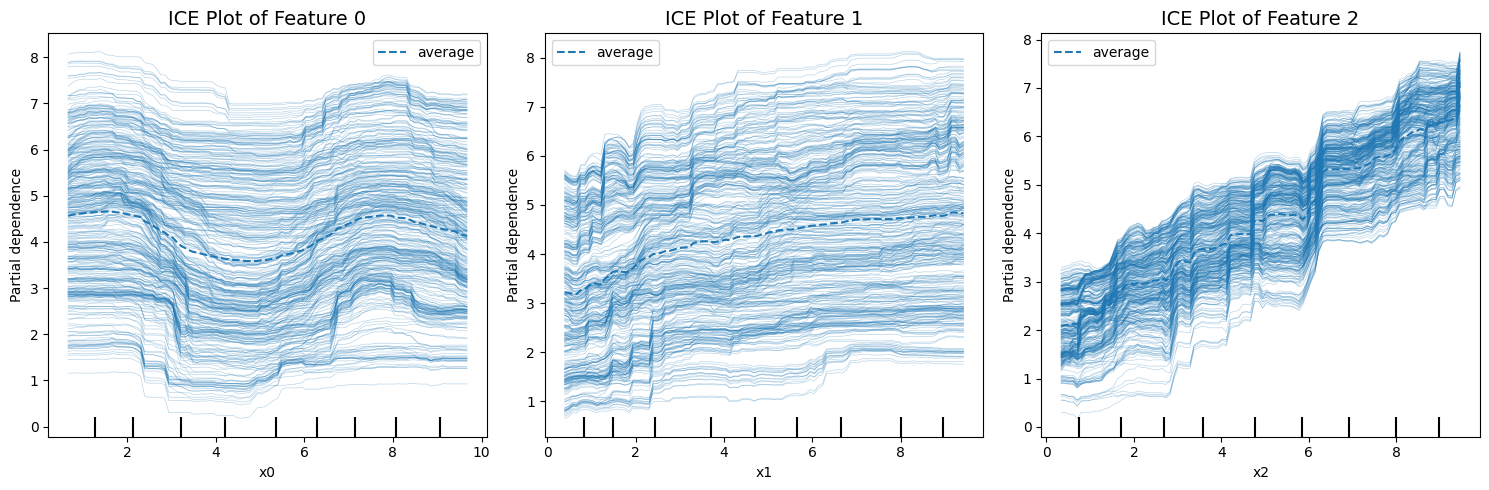

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Generate synthetic data with three features
np.random.seed(42)
X = np.random.rand(500, 3) * 10  # Three features
y = (np.sin(X[:, 0]) + np.log(X[:, 1] + 1) + 0.5 * X[:, 2] + 
     np.random.normal(scale=0.3, size=500))  # Nonlinear target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Define features for ICE plots
features = [0, 1, 2]  # Feature indices

# Create subplots for ICE plots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))  # One row, three columns

# Generate ICE plots for each feature
for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(
        model, X_train, features=[feature], ax=axes[i], kind="both"  # "both" gives PDP + ICE curves
    )
    axes[i].set_title(f"ICE Plot of Feature {feature}", fontsize=14)
    axes[i].set_xlabel(f"Feature {feature} Value", fontsize=12)
    axes[i].set_ylabel("Predicted Response", fontsize=12)
    axes[i].grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Accumulated local effects
Accumulated local effects plots are similar to PDP and ICE plots, i.e., they show how a feature affects the prediction on average. However, the main benefit of ALE plots is that they do not suffer about problems caused by the independence assumption.  So, they are an unbiased alternative to PDP plots. Unfortunately, there are no easily installable libraries for ALE in Python any more.

![ale_plot](./images/ale.png)

C:\Users\mikko\pyth_envs\book\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\mikko\pyth_envs\book\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\mikko\pyth_envs\book\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\mikko\pyth_envs\book\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\mikko\pyth_envs\book\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

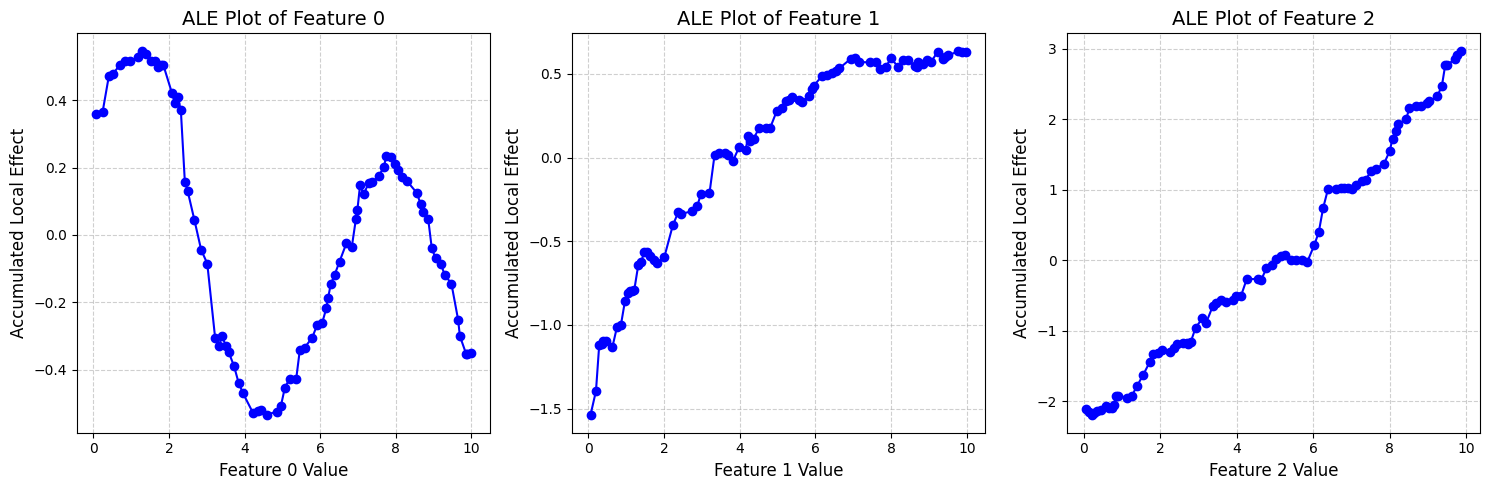

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE

# Generate synthetic data with three features
np.random.seed(42)
X = np.random.rand(500, 3) * 10  # Three features
y = (np.sin(X[:, 0]) + np.log(X[:, 1] + 1) + 0.5 * X[:, 2] + 
     np.random.normal(scale=0.3, size=500))  # Nonlinear target

# Convert X to a Pandas DataFrame for compatibility with Alibi
feature_names = ["Feature 0", "Feature 1", "Feature 2"]
X_df = pd.DataFrame(X, columns=feature_names)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create an ALE explainer
ale = ALE(model.predict, feature_names=feature_names)

# Compute ALE for all features
ale_exp = ale.explain(X_train.values)

# Create subplots for ALE plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generate ALE plots for each feature
for i, feature in enumerate(feature_names):
    axes[i].plot(ale_exp.feature_values[i],ale_exp.ale_values[i], marker="o", color="b")
    
    # Formatting
    axes[i].set_title(f"ALE Plot of {feature}", fontsize=14)
    axes[i].set_xlabel(f"{feature} Value", fontsize=12)
    axes[i].set_ylabel("Accumulated Local Effect", fontsize=12)
    axes[i].grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()





### Local and global explanations

#### Permutation feature importance
The permutation feature importance is defined to be the increase in the prediction error when a single feature value is randomly shuffled, thus, breaking the relationship between the feature and the target. The increase of the prediction error is indicative of how much the model depends on the feature.

#### Global surrogate models
The idea of global surrogate models is very simple. We build an interpretable model that is trained to approximate a non-interpretable machine learning model. Then we analyse the ML model by examining this interpretable surrogate model. Basically, we are interpreting machine learning with machine learning.

#### Local surrogate models
Local surrogate models are very similar to global surrogate models. However, instead of a global surrogate, local surrogate models try to explain individual predictions. Currently, as far as the author knows, there is only one implementation of local surrogate models to Python, called Local Interpretable Model-agnostic Explanations (LIME).

#### Shapley additive explanations
SHapley Additive exPlanations (SHAP) is a method to explain individual predictions using the game-theoretically optimal Shapley Values. The methods give an estimate for every instance, how the model's prediction depends on each feature. Basically, the prediction is split into parts, where each part represents the effect of one feature to the prediction. This allows us to draw, for example, scatter charts that can be used to infer the functional form of the dependence between a feature and the target. Furthermore, because SHAP is based on Shapley values, it also accounts complex interactions between the features.

![shap_sc](./images/shap_sc.png)

#### Shapley additive global explanations
Because the SHAP values are contributions of each feature to the prediction, it is difficult to construct a reliable aggregate metric, for example, to feature importance. This is solved in Shapley Additive Global importancE (SAGE). Instead of estimating the contribution of features to the prediction, the SAGE values estimate the contribution of each feature to the decrease of the loss function. Therefore, for example, an average of individual explanations would be a reliable estimate of feature importance. Like SHAP, SAGE also accounts for complex feature interactions, because it is based on Shapley values.

![sage_plot](./images/sage.png)

### Decision making example - gradient boosting and a collection of interpretation metrics

In [6]:
import logging, sys
logging.disable(sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

In this example, we will train an Xgboost-model to company data that has a collection of financial figures. Then, we will use a set of interpretation metrics to analyse our results.

Let's start by loading our data. For that, we need the pandas library that has a convenient function to read csv-files.

In [7]:
import pandas as pd

**index_col=0** defines the location of an index column. This csv-file is not available anywhere. If you want to repeat the analysis, create a csv-file that has companies as rows and different financial figures as columns.

In [8]:
master_df = pd.read_csv('FINAL_FIGURES_PANEL.csv',index_col=0)

Our example data is not the best one. It has many missing values and even some inf-values. To make further analysis easier, I set pandas to consider inf-values as nan-values.

In [9]:
pd.options.mode.use_inf_as_na = True

We build a model where we try to predict Tobin's Q using other financial figures from companies. Therefore we should remove those instances that do not have a Tobin's Q value. With **loc** we can locate instances, in this case, those instances that have a missing value (**isna()** tells that) in the Tobin's Q variable.
Because we removed some instances, the index is now all messed up. With **reset_index()** we can set it back to a sequential row of numbers.

In [10]:
master_df = master_df.loc[~master_df['TobinQ'].isna()]
master_df.reset_index(inplace=True,drop=True)

Below, we apply winsorisation to the data. An explanation from Wikipedia: "Winsorisation is the transformation of statistics to set all outliers to a specified percentile of the data; for example, a 90% winsorisation would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile.

In [11]:
master_df['TobinQ'].clip(lower=master_df['TobinQ'].quantile(0.05), upper=master_df['TobinQ'].quantile(0.95),inplace = True)

With pandas, we can quickly draw a histogram of a variable. Here is Tobin's Q. The higher frequency of values around twelve is caused by winsorisation.

<AxesSubplot:>

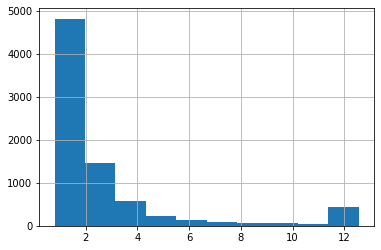

In [12]:
master_df['TobinQ'].hist()

Our dataframe has many variables. However, there are very similar variables, and we use only part of them to get meaningful results.

In [13]:
master_df.columns

Index(['CIK', 'Name', 'Year', 'TOTAL ASSETS (U.S.$)', 'COMMON EQUITY (U.S.$)',
       'MARKET CAPITALIZATION (U.S.$)', 'NET SALES OR REVENUES (U.S.$)',
       'NET INCOME (U.S.$)', 'EARNINGS PER SHARE',
       'EARNINGS BEF INTEREST & TAXES', 'DIVIDEND YIELD - CLOSE',
       'NET SALES/REVENUES -1YR ANN GR', 'NET INCOME - 1 YR ANNUAL GROWT',
       'RETURN ON EQUITY - TOTAL (%)', 'RETURN ON ASSETS',
       'RETURN ON INVESTED CAPITAL', 'SELLING, GENERAL & ADM / SALES',
       'RESEARCH & DEVELOPMENT/SALES', 'OPERATING PROFIT MARGIN',
       'TOTAL DEBT % TOTAL CAPITAL/STD', 'QUICK RATIO', 'CURRENT RATIO',
       'BRANDS, PATENTS - NET', 'BRANDS, PATENTS - ACCUM AMORT',
       'BRANDS, PATENTS - GROSS', 'EMPLOYEES',
       'EMPLOYEES - 1 YR ANNUAL GROWTH', 'SALES PER EMPLOYEE',
       'ASSETS PER EMPLOYEE', 'CURRENT LIABILITIES-TOTAL', 'TOTAL LIABILITIES',
       'TOTAL INVESTMENT RETURN', 'PRICE/BOOK VALUE RATIO - CLOSE',
       'PRICE VOLATILITY', 'FOREIGN ASSETS % TOTAL ASSETS',
    

As predictors, we pick the following variables. There are still highly correlating variables. One good aspect of tree-based boosting methods is that multicollinearity is much less of an issue.

In [14]:
features = ['Year', 'DIVIDEND YIELD - CLOSE',
       'NET SALES/REVENUES -1YR ANN GR', 'NET INCOME - 1 YR ANNUAL GROWT',
       'RETURN ON EQUITY - TOTAL (%)', 'RETURN ON ASSETS',
       'RETURN ON INVESTED CAPITAL', 'SELLING, GENERAL & ADM / SALES',
       'RESEARCH & DEVELOPMENT/SALES', 'OPERATING PROFIT MARGIN',
       'TOTAL DEBT % TOTAL CAPITAL/STD', 'QUICK RATIO', 'CURRENT RATIO',
       'TOTAL INVESTMENT RETURN',
       'PRICE VOLATILITY', 'FOREIGN ASSETS % TOTAL ASSETS',
       'FOREIGN SALES % TOTAL SALES', 'FOREIGN INCOME % TOTAL INCOME',
       'FOREIGN RETURN ON ASSETS', 'FOREIGN INCOME MARGIN',
       'ACCOUNTS PAYABLE/SALES', 'CASH FLOW/SALES', 'COST OF GOODS SOLD/SALES']

Winsorisation.

In [15]:
master_df[features] = master_df[features].clip(lower=master_df[features].quantile(0.05), upper=master_df[features].quantile(0.95), axis = 1)

With the pandas function **describe()**, we can easily calculate basic statistics for the features.

In [16]:
master_df[features].describe().transpose()

count         mean         std        min  \
Year                            7921.0  2005.090393    7.337131  1994.0000   
DIVIDEND YIELD - CLOSE          7893.0     0.486829    0.910837     0.0000   
NET SALES/REVENUES -1YR ANN GR  7579.0    11.159821   30.259285   -38.0540   
NET INCOME - 1 YR ANNUAL GROWT  3815.0    45.183943  112.854050   -75.5250   
RETURN ON EQUITY - TOTAL (%)    6862.0    -4.885381   38.409156  -123.8240   
RETURN ON ASSETS                7687.0    -9.839917   37.518729  -140.5340   
RETURN ON INVESTED CAPITAL      7305.0    -6.064327   34.695127  -116.9260   
SELLING, GENERAL & ADM / SALES  7640.0    36.152825   41.764955     8.5995   
RESEARCH & DEVELOPMENT/SALES    6635.0    10.029486   11.853524     0.0000   
OPERATING PROFIT MARGIN         7694.0   -14.559555   61.399007  -243.9660   
TOTAL DEBT % TOTAL CAPITAL/STD  7793.0    25.006322   25.731029     0.0000   
QUICK RATIO                     7863.0     1.782639    1.444924     0.2100   
CURRENT RATIO                   7894.0     2.607263    1.719357     0.3800   
TOTAL INVESTMENT RETURN         7601.0    11.283903   56.890718   -73.2100   
PRICE VOLATILITY                6706.0    40.259398   15.117033    19.5625   
FOREIGN ASSETS % TOTAL ASSETS   6078.0    11.155938   14.960890     0.0000   
FOREIGN SALES % TOTAL SALES     6762.0    32.920694   25.527471     0.0000   
FOREIGN INCOME % TOTAL INCOME   5593.0    19.151371   32.119147   -18.9100   
FOREIGN RETURN ON ASSETS        3705.0    35.858306   77.912989   -47.2420   
FOREIGN INCOME MARGIN           3977.0     5.135768    8.061430   -10.5760   
ACCOUNTS PAYABLE/SALES          7676.0    10.580265    8.139577     3.1700   
CASH FLOW/SALES                 7702.0    -6.902811   45.553832  -176.3760   
COST OF GOODS SOLD/SALES        7672.0    60.270517   16.469725    23.0600   

                                      25%        50%         75%         max  
Year                            1999.0000  2005.0000  2011.00000  2018.00000  
DIVIDEND YIELD - CLOSE             0.0000     0.0000     0.58000     2.96000  
NET SALES/REVENUES -1YR ANN GR    -5.7000     6.4700    22.32500    91.86900  
NET INCOME - 1 YR ANNUAL GROWT   -18.8100    15.1100    62.18500   406.44900  
RETURN ON EQUITY - TOTAL (%)      -9.7600     7.0200    16.31750    37.71850  
RETURN ON ASSETS                  -9.0950     3.9300     8.73000    18.58700  
RETURN ON INVESTED CAPITAL        -8.8900     5.8600    12.79000    27.58000  
SELLING, GENERAL & ADM / SALES    15.5675    22.2400    33.48500   185.97300  
RESEARCH & DEVELOPMENT/SALES       1.9100     5.3800    13.65500    46.55100  
OPERATING PROFIT MARGIN           -5.0300     5.6200    11.09750    21.11800  
TOTAL DEBT % TOTAL CAPITAL/STD     0.2700    18.7800    40.74000    85.84800  
QUICK RATIO                        0.8500     1.2900     2.20000     5.85000  
CURRENT RATIO                      1.4600     2.1400     3.24000     7.14700  
TOTAL INVESTMENT RETURN          -28.4400     3.7400    39.06000   151.91000  
PRICE VOLATILITY                  27.2300    38.3300    50.27750    71.87250  
FOREIGN ASSETS % TOTAL ASSETS      0.0000     4.2800    16.06000    50.85600  
FOREIGN SALES % TOTAL SALES        7.2425    33.2500    52.00000    81.54850  
FOREIGN INCOME % TOTAL INCOME      0.0000     0.0000    32.89000   104.02600  
FOREIGN RETURN ON ASSETS           0.0000     8.0300    32.59000   298.70400  
FOREIGN INCOME MARGIN              0.0000     3.7700     9.97000    23.01800  
ACCOUNTS PAYABLE/SALES             5.7580     8.0695    11.80325    37.66225  
CASH FLOW/SALES                   -0.4175     7.4300    12.15000    22.85950  
COST OF GOODS SOLD/SALES          50.3575    62.9800    72.51000    85.28350

Tobin's Q to the **y_df** dataframe.

In [17]:
y_df = master_df['TobinQ']

The features to the **x_df** dataframe.

In [18]:
x_df = master_df[features]

In [19]:
x_df

Year  DIVIDEND YIELD - CLOSE  NET SALES/REVENUES -1YR ANN GR  \
0     1994                    2.96                           3.120   
1     1994                    2.96                          -0.450   
2     1994                    2.56                          15.240   
3     1995                    2.81                          20.290   
4     1996                    2.96                         -25.190   
...    ...                     ...                             ...   
7916  2018                    0.00                          44.050   
7917  2018                    0.00                          91.869   
7918  2017                     NaN                           4.210   
7919  2018                    0.00                          38.250   
7920  2018                    0.00                          34.750   

      NET INCOME - 1 YR ANNUAL GROWT  RETURN ON EQUITY - TOTAL (%)  \
0                              57.04                       13.8300   
1                             -19.62                       12.2000   
2                              78.96                       20.2200   
3                              21.14                       19.6700   
4                             -42.75                       13.8400   
...                              ...                           ...   
7916                          187.40                       25.2500   
7917                             NaN                           NaN   
7918                             NaN                           NaN   
7919                             NaN                     -123.8240   
7920                             NaN                       37.7185   

      RETURN ON ASSETS  RETURN ON INVESTED CAPITAL  \
0                6.300                       9.710   
1                5.110                       7.990   
2                7.360                      11.960   
3                7.900                      13.090   
4                5.520                       9.500   
...                ...                         ...   
7916            12.420                      16.720   
7917          -140.534                    -116.926   
7918          -128.150                    -116.926   
7919          -123.070                    -116.926   
7920            18.587                      27.580   

      SELLING, GENERAL & ADM / SALES  RESEARCH & DEVELOPMENT/SALES  \
0                             18.510                         4.300   
1                             18.810                         4.260   
2                             18.700                         4.200   
3                             18.260                         4.210   
4                             15.050                         4.040   
...                              ...                           ...   
7916                          18.570                        12.000   
7917                         185.973                        46.551   
7918                         108.240                           NaN   
7919                          84.450                           NaN   
7920                          69.070                           NaN   

      OPERATING PROFIT MARGIN  ...  TOTAL INVESTMENT RETURN  PRICE VOLATILITY  \
0                       6.980  ...                    18.71             23.25   
1                       5.850  ...                     3.49             20.97   
2                       7.560  ...                    46.94             21.75   
3                       7.280  ...                     0.05             21.16   
4                       7.610  ...                    60.91             26.41   
...                       ...  ...                      ...               ...   
7916                   16.550  ...                    69.58               NaN   
7917                 -243.966  ...                      NaN               NaN   
7918                  -22.420  ...                      NaN               NaN   
7919                  -1

#### Gradient boosting
**Xgboost** is implemented as a Python library, which we import here and name it **xgb**.

In [21]:
import xgboost as xgb

Xgboost uses its' own data structure, called DMatrix. It speeds up calculations significantly and saves memory. We feed the data as pandas dataframes. The data can also be numpy arrays. **nthread = -1** tells Xgboost to use all the cores available for calculations.

In [22]:
dtrain = xgb.DMatrix(x_df, label=y_df, nthread = -1)

Next, we need to define the parameters of the xgboost model. This is a very difficult task.. You can easily play with different hyperparameter settings for days, and still finding combinations that improve performance. And here is only part of the parameters! More info about the parameters is here: [xgboost.readthedocs.io/en/latest/parameter.html](https://xgboost.readthedocs.io/en/latest/parameter.html)

In [23]:
m_depth = 5
eta = 0.1
ssample = 0.8
col_tree = 0.8
m_child_w = 3
gam = 1.
objective = 'reg:squarederror'
param = {'max_depth': m_depth, 'eta': eta, 'subsample': ssample,
         'colsample_bytree': col_tree, 'min_child_weight' : m_child_w, 'gamma' : gam,'objective' : objective}

Xgboost has a function for cross-validation. We use here 5 folds. The metric is **mean absolute error**.
![validation](./images/Train-Test-Validation.png)

In [24]:
temp = xgb.cv(param,dtrain,num_boost_round=1500,nfold=5,seed=10,metrics='mae')

To plot how our *mae* is decreasing, we load Matplotlib.

In [25]:
import matplotlib.pyplot as plt

There are indications for overfitting, but let's proceed. Around 800 rounds (decision trees), the validation error is minimum, so let's use that.

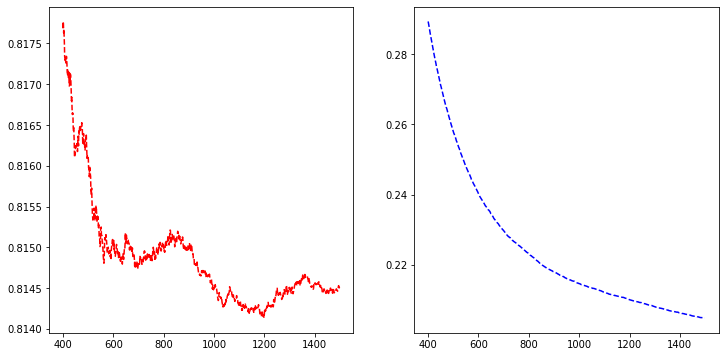

In [28]:
fig, axs = plt.subplots(1,2,figsize=(12,6),squeeze=True)
axs[0].plot(temp['test-mae-mean'][400:1500],'r--')
axs[1].plot(temp['train-mae-mean'][400:1500],'b--')
plt.show()

In [29]:
b_rounds = 1200

**train()** is used for training. We feed the parameters, the data in a DMAtrix format and the number of boosting rounds to the function.

In [30]:
bst = xgb.train(param,dtrain,num_boost_round=b_rounds)

#### SHAP

Now we have our model trained, and we can start analysing it. Let's start with SHAP [github.com/slundberg/shap](https://github.com/slundberg/shap)

In [31]:
import shap

In [32]:
j=0
shap.initjs()

We define a SHAP tree-explainer and use the data to calculate the SHAP values.

In [33]:
explainerXGB = shap.TreeExplainer(bst)
shap_values_XGB = explainerXGB.shap_values(x_df,y_df)

SHAP has many convenient functions for model analysis.

Summary_plot with **plot_type = 'bar'** for a quick feature importance analysis. However, for global importance analysis, you should use SAGE instead, because SHAP is prone to errors with the least important features.

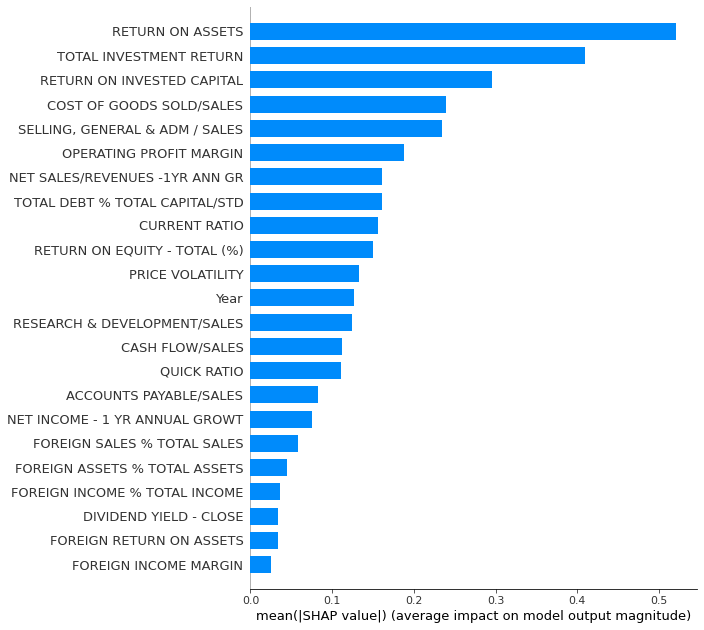

In [34]:
shap.summary_plot(shap_values_XGB,x_df,plot_type='bar',max_display=30)

With **plot_type = 'dot'** we get a much more detailed plot.

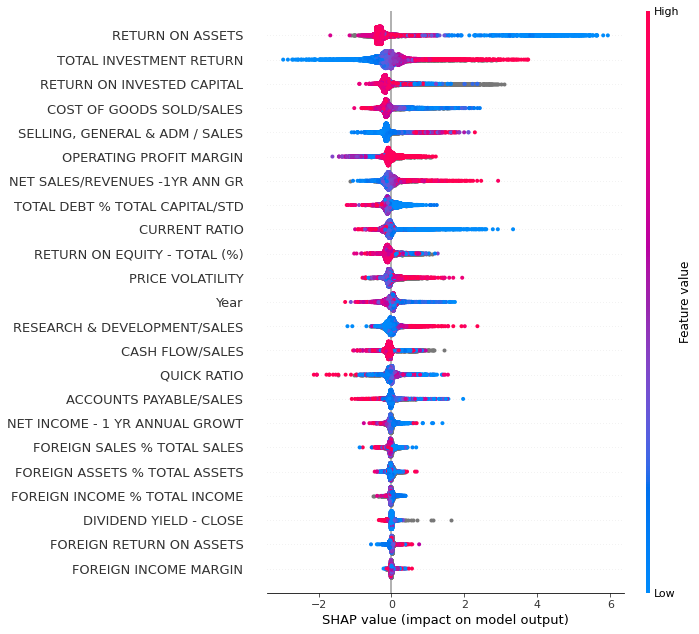

In [35]:
shap.summary_plot(shap_values_XGB,x_df,plot_type='dot',max_display=30)

Next, we use the SHAP values to build up 2D scatter graphs for every feature. It shows the effect of a feature for the prediction for every instance.

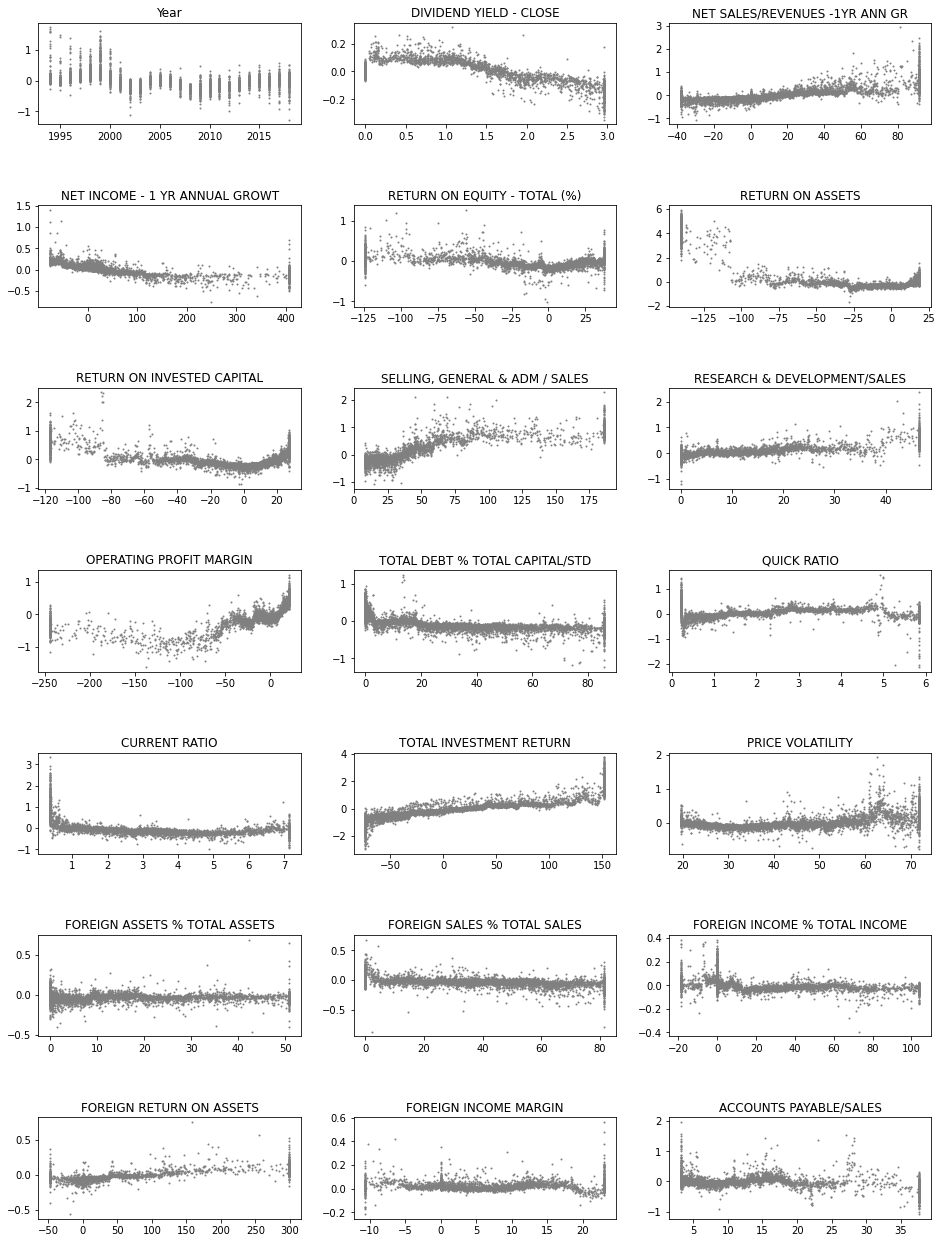

In [38]:
fig, axs = plt.subplots(7,3,figsize=(16,22),squeeze=True)
ind = 0
for ax,feat in zip(axs.flat,x_df.columns):
    ax.scatter(x_df[feat],shap_values_XGB[:,ind],s=1,color='gray')
    ax.set_title(feat)
    ind+=1
plt.subplots_adjust(hspace=0.8)

**Decision_plot()** is interesting as it shows how the prediction is formed from the contributions of different features.

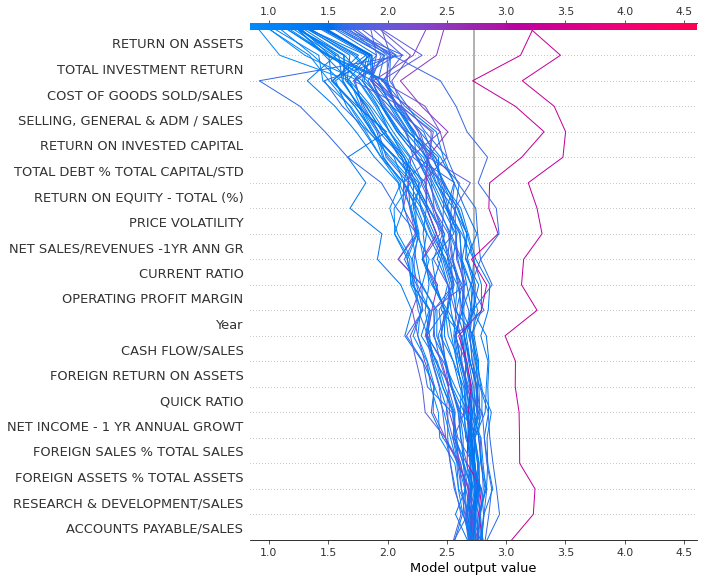

In [39]:
shap.decision_plot(explainerXGB.expected_value,shap_values_XGB[100:150],features)

**Force_plot** is similar to decision_plot. We plot only the first 100 instances because it would be very slow to draw a force_plot with all the instances.

In [40]:
shap.force_plot(explainerXGB.expected_value,shap_values_XGB[0:50],features,figsize=(20,10))

#### Other interpretation methods

For the following methods, we need to use Xgboost's Scikit-learn wrapper **XGBRegressor()** to turn our Xgboost to be compatible with the Scikit-learn ecosystem.

In [41]:
m_depth = 5
eta = 0.1
ssample = 0.8
col_tree = 0.8
m_child_w = 3
gam = 1.
objective = 'reg:squarederror'
param = {'max_depth': m_depth, 'eta': eta, 'subsample': ssample,
         'colsample_bytree': col_tree, 'min_child_weight' : m_child_w, 'gamma' : gam,'objective' : objective}

Our xgboost model as a Scikit-learn model.

In [42]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=col_tree, gamma=gam,
                                  learning_rate=eta, max_depth=m_depth,
                                  min_child_weight=m_child_w, n_estimators=800, subsample=ssample)

**fit()** is used to train a model in Scikit.

In [43]:
best_xgb_model.fit(x_df,y_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

Scikit-learn has libraries for Partial dependece plot and Individual conditional expectations.

In [44]:
from sklearn.inspection import plot_partial_dependence

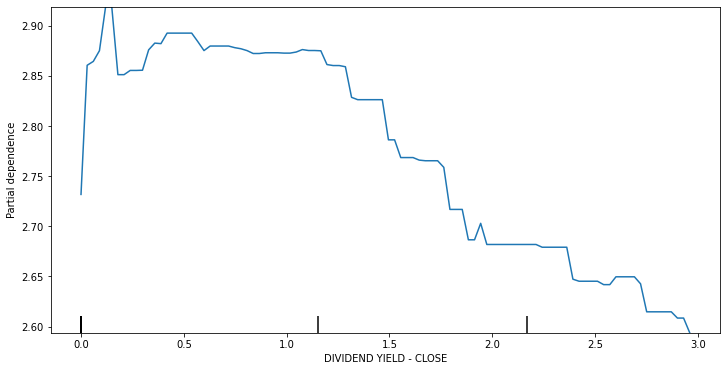

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_partial_dependence(best_xgb_model, x_df, ['DIVIDEND YIELD - CLOSE'],ax=ax)
plt.show()

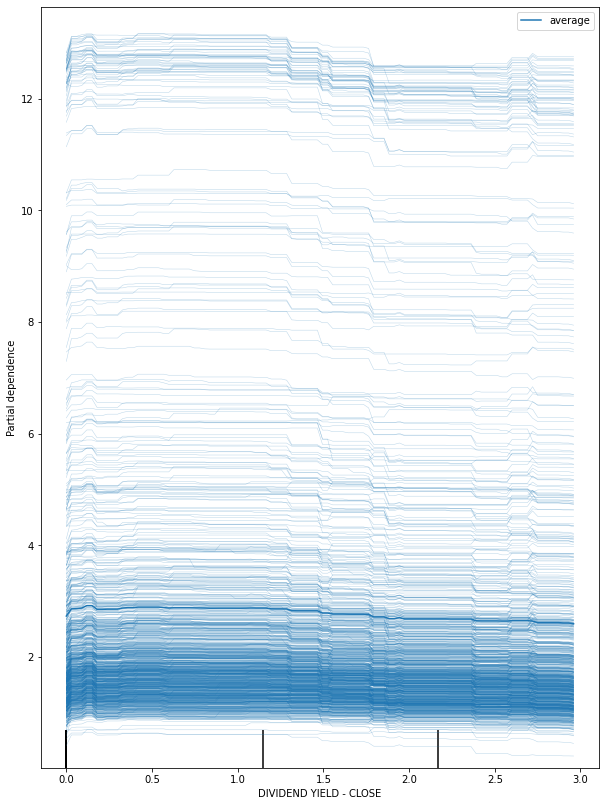

In [46]:
fig, ax = plt.subplots(figsize=(10, 14))
plot_partial_dependence(best_xgb_model, x_df, ['DIVIDEND YIELD - CLOSE'],ax=ax,kind='both')
plt.show()

Permutation importance

In [47]:
from sklearn.inspection import permutation_importance

In [48]:
r = permutation_importance(best_xgb_model, x_df, y_df,n_repeats=30,random_state=0)

In [52]:
importance_df = pd.DataFrame()
importance_df['Features'] = x_df.columns
importance_df['Importance'] = r.importances_mean

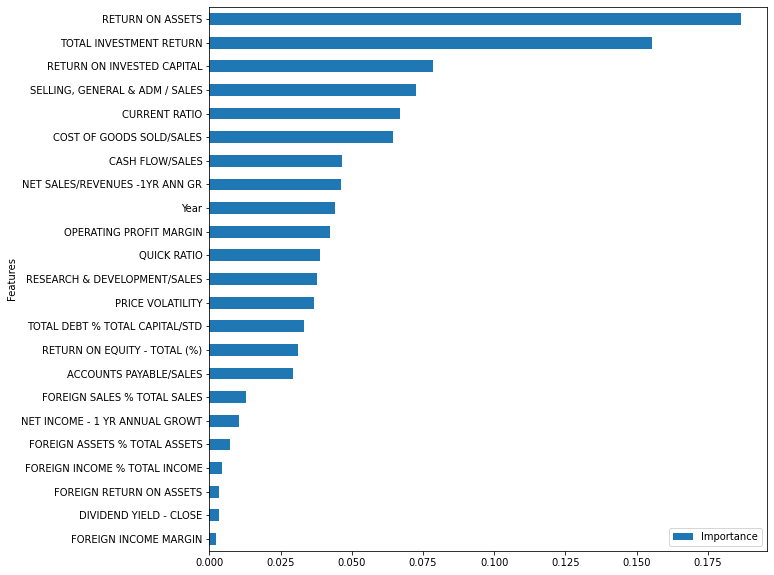

In [65]:
importance_df.set_index('Features').sort_values('Importance').plot.barh(figsize=(10,10))
plt.show()